In [1]:
# Works very well with Numpy and Pandas
    # Designed to have a similar feel as Matlab
    # Functional method vs. Object Oriented API method (better!) -> figure/ subplots
    # plt.style.use('ggplot')  #plot_bmh,plot_fivethirtyeight,plot_ggplot and more
    # https://matplotlib.org/stable/tutorials/introductory/lifecycle.html
# Seaborn is built on MatplotLib
    # works well with Pandas dataframes
    # http://seaborn.pydata.org/api.html
    # displot/ histplot => rugplot / kdeplot
    # jointplot                          #kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
    # pairplot
    # barplot/ countplot
    # boxplot/ violinplot / stripplot (jitter=True)
    # catplot                            #kind = strip, swarm, box, violin, boxen, point, bar, count
                                         #boxen - https://vita.had.co.nz/papers/letter-value-plot.html
    # heatmap / clustermap
    # Grid for more flexibility (vs. Pairplot): PairGrid (all numeric) + map_diag/map_upper/map_lower / FacetGrid (user defined)
    # Regression: lmplot
    # STYLING: set_context, set_style, set_theme
# Pandas in-built visualization - it calls matplotlib
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch
# Figuring out relevant KWARG
    # Guess something - if it doesn't work, you can figure out from the error message - look for something similar sounding
# Plotly & Cufflinks
    # Plotly - interactive visualiaation library
    # Cufflink - connects plotly to Pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#allows to see graphs in notebook
%matplotlib inline

#plt.show()

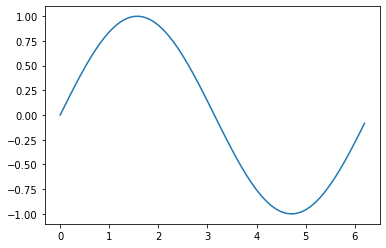

In [4]:
x1 = np.arange(0,2*np.pi,.1)
y1 = np.sin(x1)
plt.plot(x1,y1)

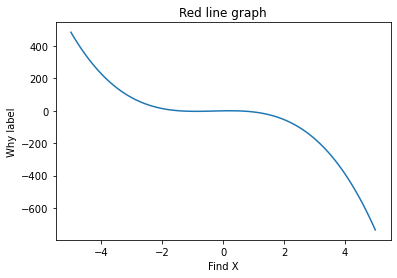

In [5]:
x = np.linspace(-5,5,100)
y = 3*x + (-5)*(x**2) - 5*(x**3)
plt.plot(x,y)
plt.xlabel('Find X'), plt.ylabel('Why label'), plt.title('Red line graph')

plt.show()

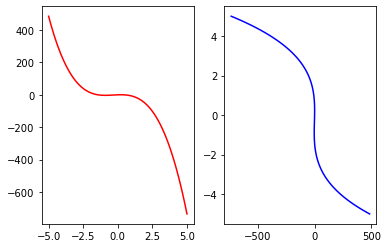

In [6]:
# Multiplots
plt.subplot(1,2,1)         # no. of Rows, no. of Columns, Plot number
plt.plot(x,y,'r')

plt.subplot(1,2,2)         # no. of Rows, no. of Columns, Plot number
plt.plot(y,x,'b')

plt.show()

Text(0.5, 1.0, 'line graph')

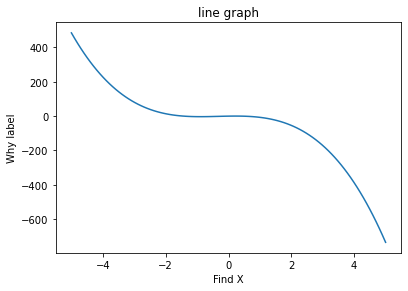

In [7]:
# Object Oriented API Method

#Create Figure objects
fig = plt.figure()                            # Creates a Fig object
axes = fig.add_axes([0.1,0.1,0.8,0.8])        # Left, Bottom, Width, Height - all values must be within [0,1] - NO!!!


axes.plot(x,y)
axes.set_xlabel('Find X')
axes.set_ylabel('Why label')
axes.set_title('line graph')

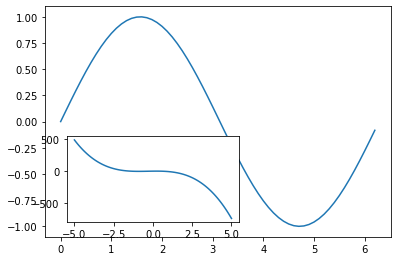

In [8]:
fig = plt.figure()                            
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.15,0.15,0.4,0.3])

axes1.plot(x1,y1)
axes2.plot(x,y)

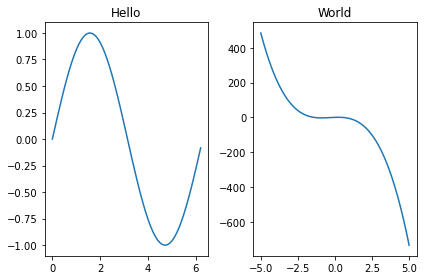

In [9]:
#Subplots
fig, axes = plt.subplots(1,2)  # shortcut way to plt.figure + fig.add_axes

# AXES is an iterable array
# for current_ax in axes:
#     current_ax.plot(x,y)

axes[0].plot(x1,y1)
axes[1].plot(x,y)
axes[0].set_title('Hello')
axes[1].set_title('World')

plt.tight_layout()

In [11]:
type(axes), len(axes), type(fig)

(numpy.ndarray, 2, matplotlib.figure.Figure)

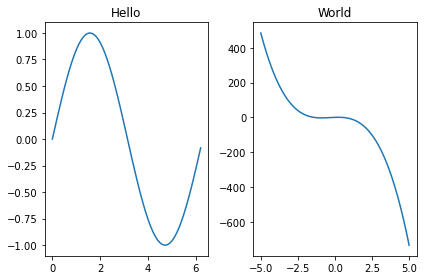

In [12]:
fig

## Fig Size & DPI

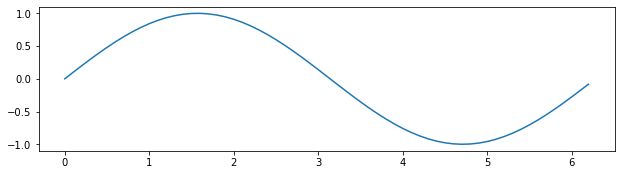

In [13]:
fig = plt.figure(figsize=(8,2))                 # Width, height in inches
ax = fig.add_axes([0,0,1,1])
ax.plot(x1,y1)

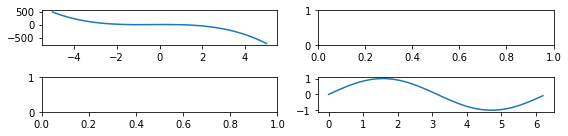

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,2))                   # Fig size of 8,2 shows different in this cell
axes[0][0].plot(x,y)
axes[1][1].plot(x1,y1)
plt.tight_layout()

In [16]:
axes.shape, axes

((2, 2),
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

## Saving Figure

In [15]:
fig.savefig('python_pic.png', dpi=200)  # jpg, png, etc.

## Legend & Customization

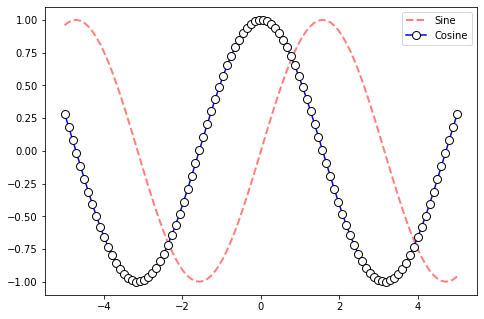

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, np.sin(x), label='Sine', color='red', lw=2,alpha=0.5, ls='--' )
ax.plot(x, np.cos(x), label='Cosine', color='blue', marker='o', markersize=8, markerfacecolor='white', markeredgecolor='black')

# ax.set_xlim([-3,3])

ax.legend(loc='best')                                      # shows the labes specific while plotting

# Seaborn 
* http://seaborn.pydata.org/api.html

### Distribution plot

In [17]:
import seaborn as sns
%matplotlib inline

sns.set_theme(style="whitegrid", palette="deep")

In [18]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


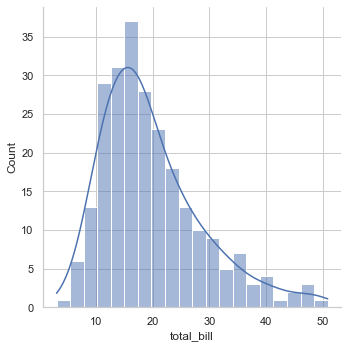

In [20]:
sns.displot(tips['total_bill'], kde=True, bins=20)

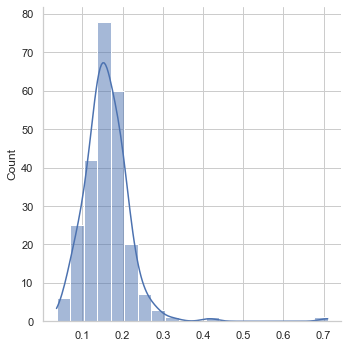

In [21]:
sns.displot(tips['tip']/tips['total_bill'], kde=True, bins=20)

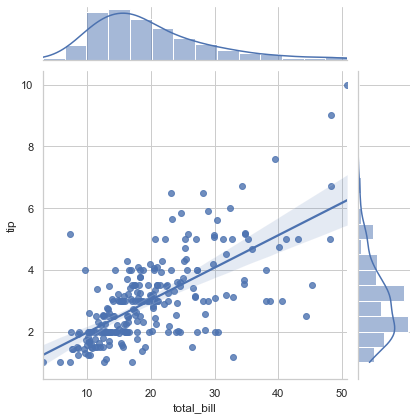

In [22]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg') #kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

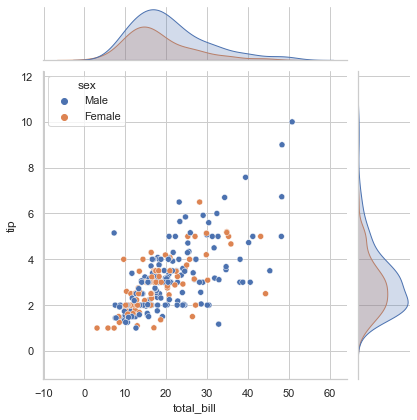

In [23]:
sns.jointplot(x='total_bill', y='tip', data=tips, hue='sex')

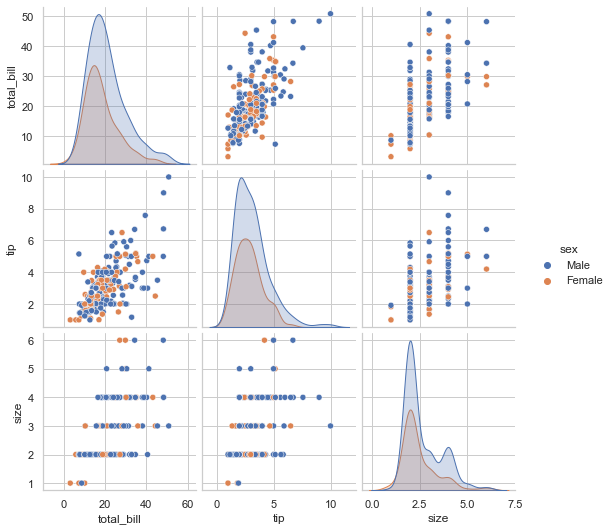

In [25]:
sns.pairplot(data=tips, hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

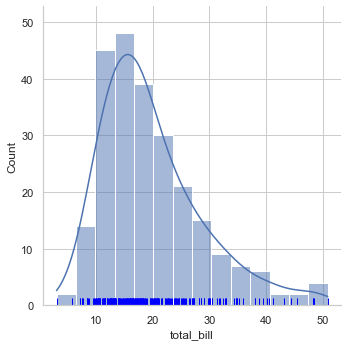

In [26]:
sns.displot(tips['total_bill'], kde=True)
sns.rugplot(tips['total_bill'], color='blue')

In [27]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

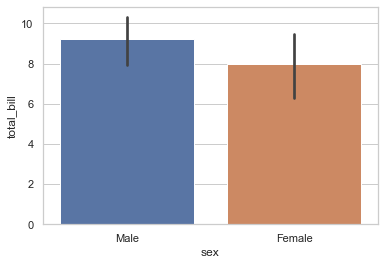

In [28]:
sns.barplot(y='total_bill', x='sex', data=tips, estimator=np.std)

In [29]:
tips.groupby('sex').std()

,total_bill,tip,size
sex,,,
Male,9.246469,1.489102,0.955997
Female,8.009209,1.159495,0.937644


<AxesSubplot:xlabel='sex', ylabel='count'>

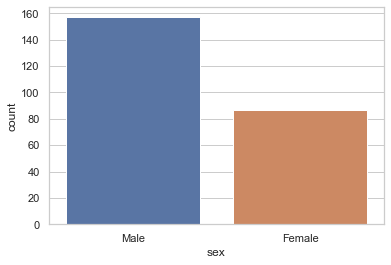

In [30]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

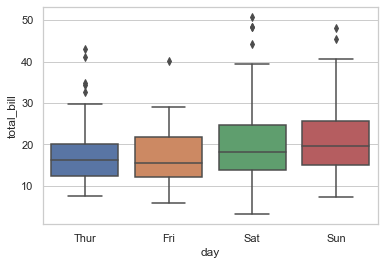

In [31]:
sns.boxplot(x='day',y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

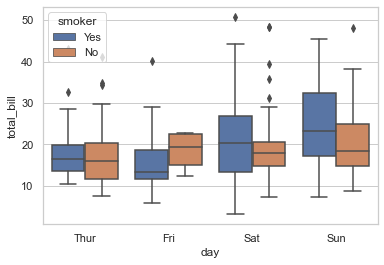

In [32]:
sns.boxplot(x='day',y='total_bill', data=tips, hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

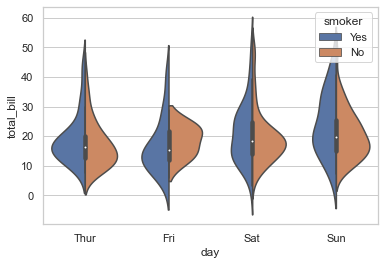

In [33]:
sns.violinplot(x='day',y='total_bill', data=tips, hue='smoker',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

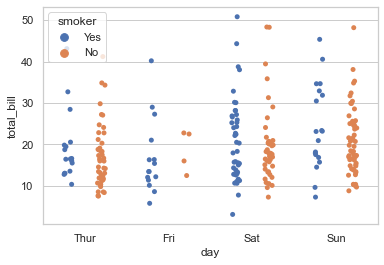

In [34]:
sns.stripplot(x='day',y='total_bill', data=tips, hue='smoker', dodge=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

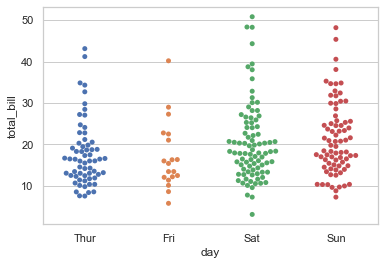

In [35]:
sns.swarmplot(x='day',y='total_bill', data=tips)

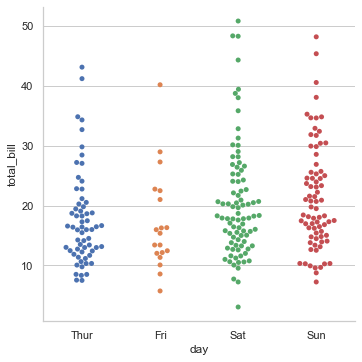

In [36]:
sns.catplot(x='day',y='total_bill', data=tips, kind='swarm')

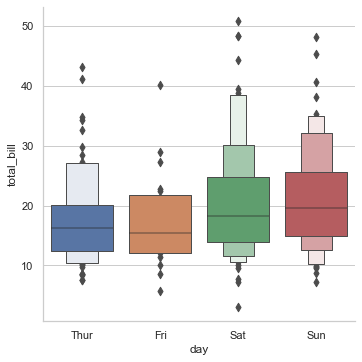

In [37]:
sns.catplot(x='day',y='total_bill', data=tips, kind='boxen')

In [38]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [39]:
# Matrix Plot

flights_matrix = pd.pivot_table(flights, values='passengers', index='year', columns='month')

<AxesSubplot:xlabel='month', ylabel='year'>

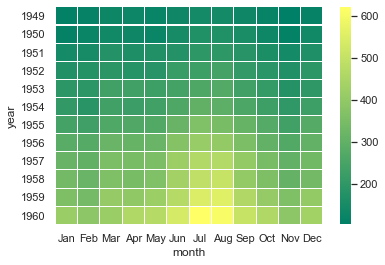

In [40]:
sns.heatmap(flights_matrix, cmap='summer', linecolor='white', linewidths=0.1)

<AxesSubplot:>

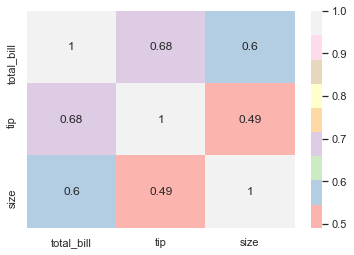

In [41]:
sns.heatmap(tips.corr(), cmap='Pastel1', annot = True)    # Figured out 'cmap' based on error message received

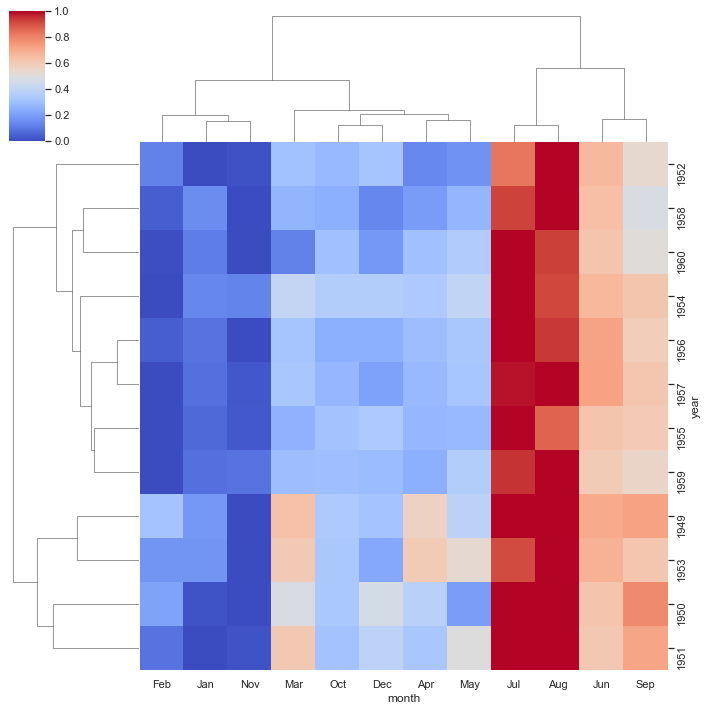

In [42]:
sns.clustermap(flights_matrix, cmap='coolwarm', standard_scale=0)     # 0: rows, 1: column

In [43]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

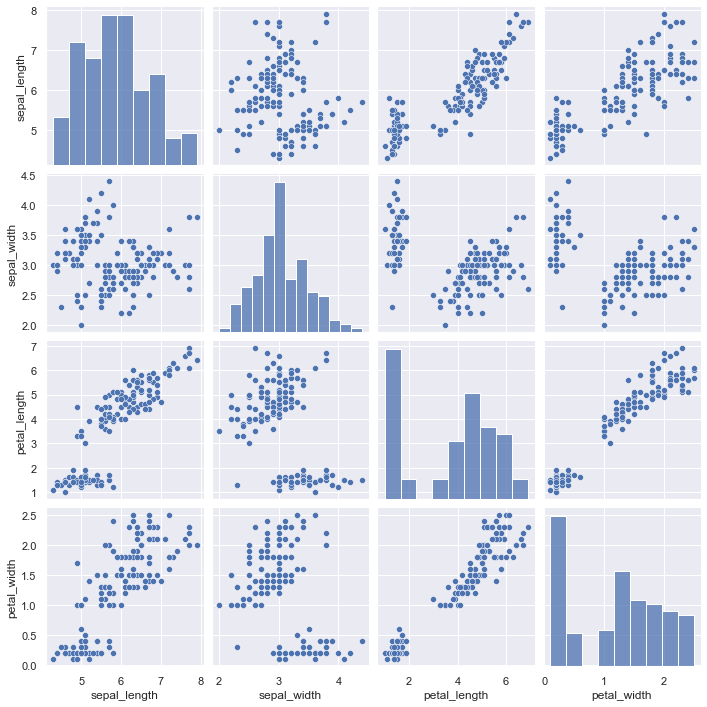

In [45]:
sns.set_theme(style='darkgrid')
sns.pairplot(iris)

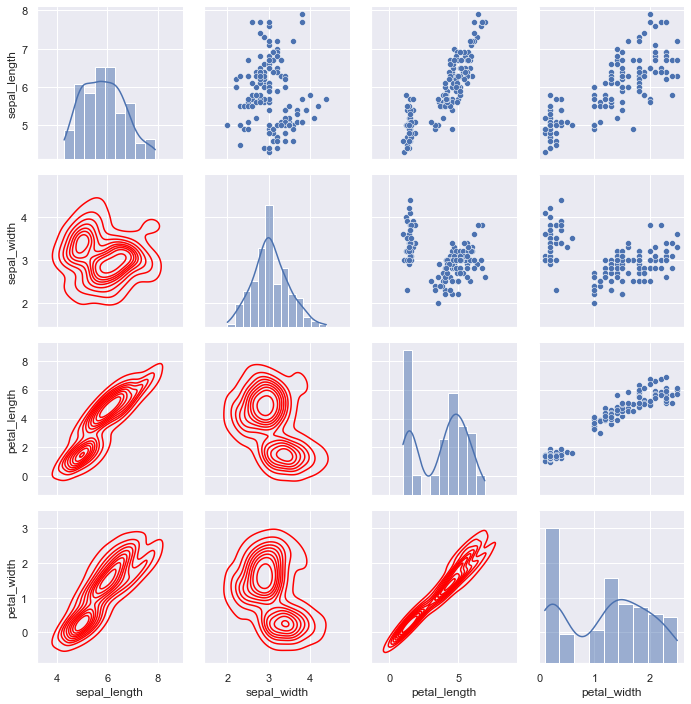

In [46]:
# sns.PairGrid(iris).map(plt.scatter)   # This works too, however, for complete control use following:

g = sns.PairGrid(iris)
g.map_diag(sns.histplot, kde=True)                # 'displot', shows histograms outside grid 
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, color='red')

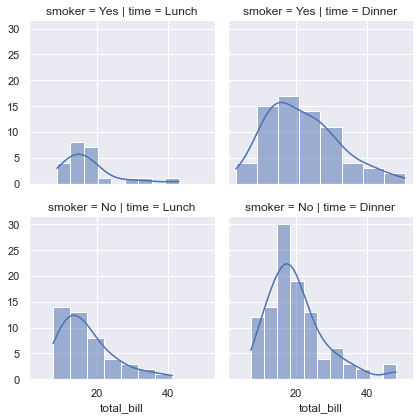

In [47]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.histplot, 'total_bill', kde=True)

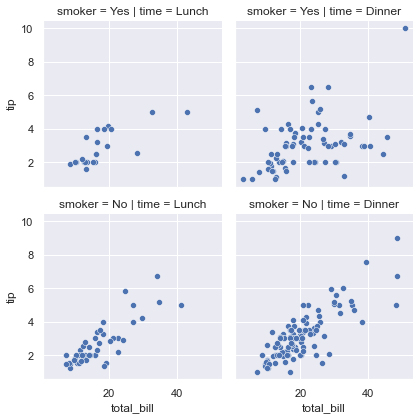

In [48]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')

## Regression Plots

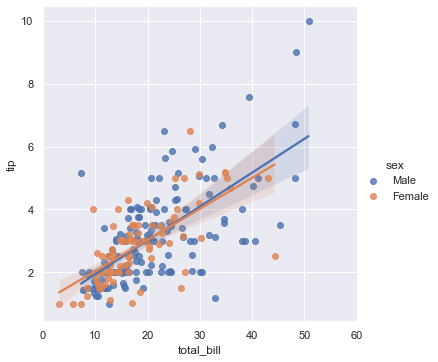

In [49]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex').set(xlim=(0,60))

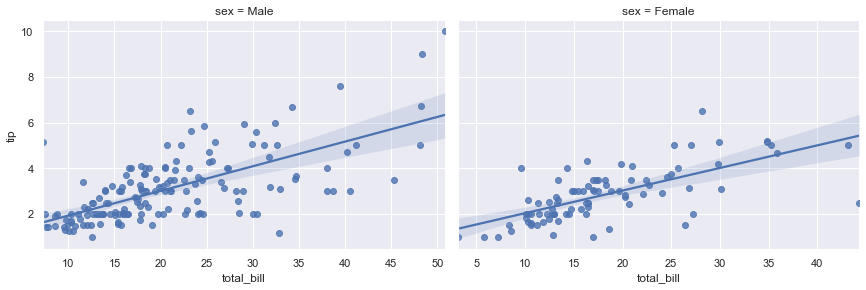

In [50]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', sharex=False, aspect=1.5, height=4)

## Styling & Color

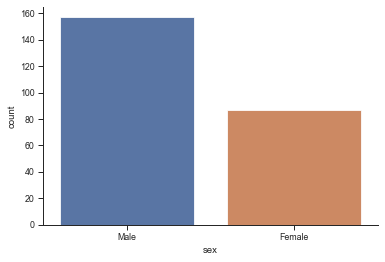

In [51]:
sns.set_style('ticks') #, whitegrid, dark, white, ticks)
sns.set_context(context='paper')
sns.countplot(x='sex', data=tips)
sns.despine()

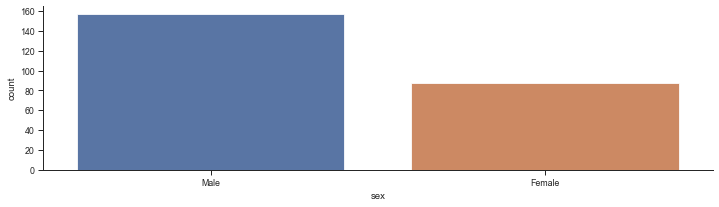

In [52]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex', data=tips)
sns.despine()

## Visualization in Pandas

In [53]:
pwd

'C:\\Users\\uditg\\Documents\\Python Scripts\\Lessons'

In [54]:
path = 'C:\\Users\\uditg\\Documents\\GitHub\\Udemy-Python-for-DS\\07-Pandas-Built-in-Data-Viz\\'
df1 = pd.read_csv(path+'df1', index_col=0)

In [55]:
df1

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436
...,...,...,...,...
2002-09-22,1.013897,-0.288680,-0.342295,-0.638537
2002-09-23,-0.642659,-0.104725,-0.631829,-0.909483
2002-09-24,0.370136,0.233219,0.535897,-1.552605
2002-09-25,0.183339,1.285783,-1.052593,-2.565844


In [56]:
df2 = pd.read_csv(path+'df2')
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


<AxesSubplot:>

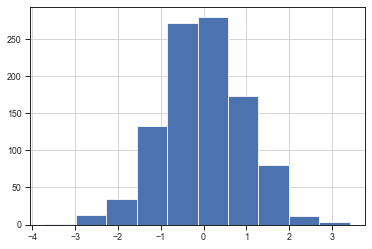

In [57]:
df1['A'].hist()

<AxesSubplot:ylabel='Frequency'>

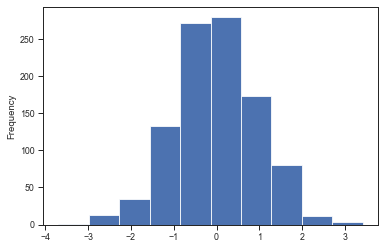

In [58]:
df1['A'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

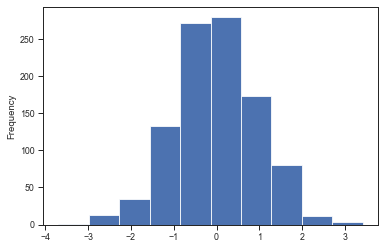

In [59]:
df1['A'].plot.hist()

<AxesSubplot:>

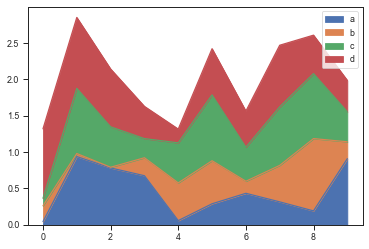

In [60]:
df2.plot.area()

<AxesSubplot:>

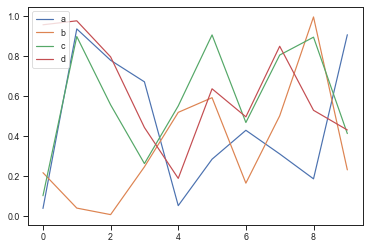

In [64]:
df2.plot.line()

<AxesSubplot:>

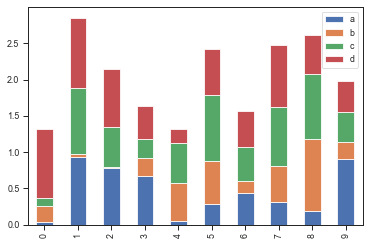

In [65]:
df2.plot.bar(stacked=True)

<AxesSubplot:ylabel='A'>

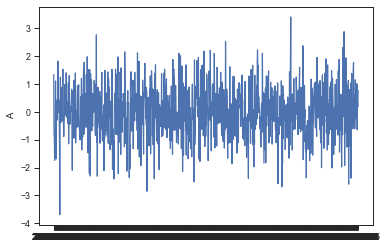

In [72]:
sns.lineplot(x=df1.index, y=df1['A'])                # more work

<AxesSubplot:>

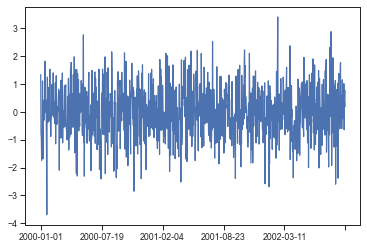

In [88]:
df1['A'].plot()                                      # less work

<AxesSubplot:>

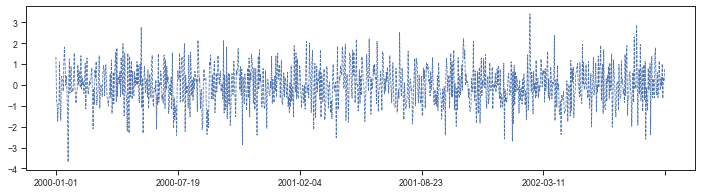

In [106]:
df1['A'].plot.line(figsize=(12,3), lw=0.8, ls='--')                                 # less work + cleaner syntax = 'plot.line()'

<AxesSubplot:>

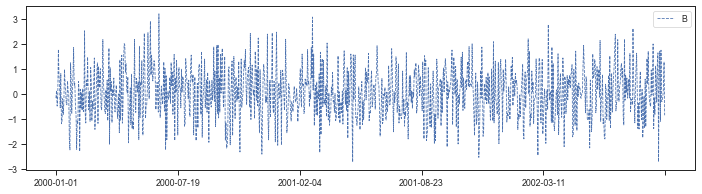

In [109]:
df1.plot.line(y='B', figsize=(12,3), lw=0.8, ls='--')     

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='A', ylabel='B'>

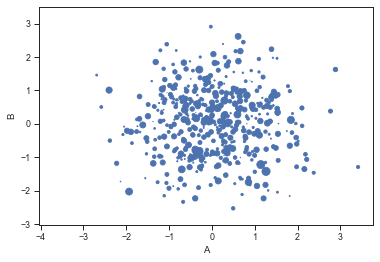

In [126]:
df1.plot.scatter(x='A', y='B', s=df1['C']*20, )  #Bubble Chart

<AxesSubplot:>

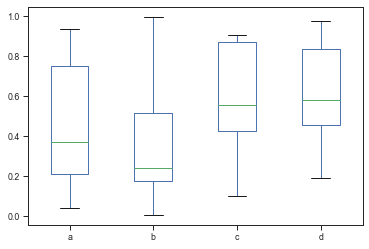

In [132]:
df2.plot.box()

In [135]:
df = pd.DataFrame(np.random.randn(1000,2), columns=list('ab'))
df.head()

,a,b
0,-1.990680,0.468359
1,-0.163828,-0.096601
2,0.743405,0.480872
3,0.637640,-0.083403
4,-0.497422,0.387804


<AxesSubplot:xlabel='a', ylabel='b'>

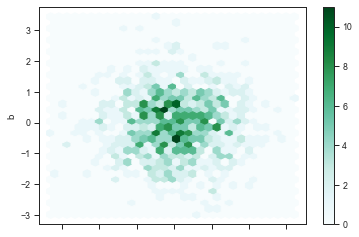

In [144]:
df.plot.hexbin(x='a', y='b', gridsize=30)

<AxesSubplot:ylabel='Density'>

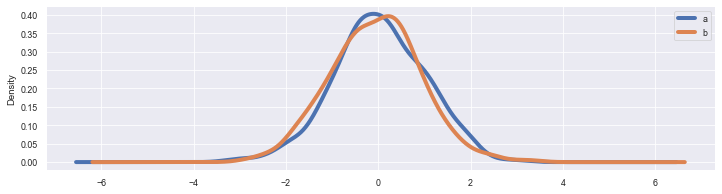

In [160]:
sns.set_style('darkgrid')
df.plot.kde(lw=4, ls='-', figsize=(12,3),)

<AxesSubplot:ylabel='Density'>

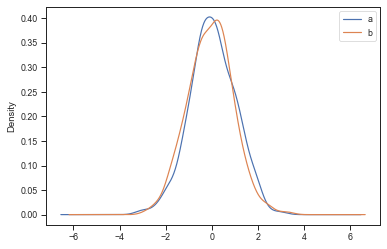

In [150]:
df.plot.density()

In [ ]:
plt.style.use('ggplot')  #plot_bmh,plot_fivethirtyeight,plot_ggplot and more